In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv('D:/OneDrive - Hanoi University of Science and Technology/Me/Code/DatainHUST/CodePV/Dữ liệu mới/Dữ liệu solar Nghệ An- chuẩn/unzipped/Fullmonth/inv1_emi_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[4]},
                index_col=['datetime']
                )

In [3]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1+0.0045*(df['Tcell']-25))*20.5/100), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']*1000/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df=df[(df['Inverter status']=='Grid connected')|(df['Inverter status']=='Grid connected : power limited')]
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]
df.head(10)

,Unnamed: 0,Site Name_x,Management Domain_x,ManageObject_x,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-22 13:25:00,970,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,410.3,409.3,407.4,236.6,233.7,...,22,13,1,Tuesday,37,517,11.828125,120787.107272,70.575413,2022-03-22
2022-03-22 13:40:00,973,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,410.2,409.5,408.4,236.4,234.1,...,22,13,1,Tuesday,37,517,11.604375,122384.542974,71.121727,2022-03-22
2022-03-26 11:10:00,1565,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,413.4,414.2,411.6,238.3,235.9,...,26,11,5,Saturday,131,611,20.556875,126509.455886,67.679526,2022-03-26
2022-03-26 13:05:00,1588,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,408.5,409.6,406.6,236.9,234.7,...,26,13,5,Saturday,133,613,17.048125,124267.884460,67.559692,2022-03-26
2022-03-26 13:20:00,1591,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,407.4,409.0,406.2,236.2,234.3,...,26,13,5,Saturday,133,613,16.731875,121387.299324,67.896724,2022-03-26
2022-04-09 10:40:00,3792,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,413.1,412.2,410.4,238.4,236.2,...,9,10,5,Saturday,130,202,12.494375,118130.321060,75.486970,2022-04-09
2022-04-09 10:45:00,3793,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,414.1,413.1,411.6,238.4,236.2,...,9,10,5,Saturday,130,202,11.572500,112587.348329,76.287435,2022-04-09
2022-04-13 12:35:00,4454,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,412.7,411.6,409.4,238.3,235.7,...,13,12,2,Wednesday,60,300,11.606250,113369.838219,74.345171,2022-04-13
2022-04-15 13:05:00,4780,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,411.7,412.2,409.1,237.2,235.8,...,15,13,4,Friday,109,349,10.645000,102450.759501,76.917927,2022-04-15


In [4]:
df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
df1=df1.reset_index()
df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
df1=df1.reset_index()
df1.loc[:,'Tcell']=pd.Series((df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)), df1.index)
df1.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df1['Irradiance(W/㎡)']/1000*(1+0.0045*(df1['Tcell']-25))*20.5/100), df1.index)
df1.loc[:,'Hieu suat']=pd.Series((df1['Total input power(kW)']*1000/df1['Pm']*100), df1.index)
df1=df1[df1['Hieu suat']<80]
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 1"))
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 1"))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

C:\Users\badao\AppData\Local\Temp\ipykernel_11396\3558223401.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()


     index  month        date  hour  Total input power(kW)  \
0        0      3  2022-03-22    13              86.144000   
1        1      3  2022-03-26    11              85.621000   
2        3      4  2022-04-09    10              87.531500   
3        4      4  2022-04-13    12              84.285000   
4        5      4  2022-04-15    13              78.803000   
..     ...    ...         ...   ...                    ...   
98     467      8  2022-08-19    11              96.852600   
99     473      8  2022-08-21    12              99.510333   
100    476      8  2022-08-22    11              94.077833   
101    483      8  2022-08-23    12              94.986500   
102    489      8  2022-08-24    12              92.957583   

     Ambient temperature(℃)  Irradiance(W/㎡)      Tcell             Pm  \
0                  6.350000       858.600000  11.716250  121586.287651   
1                 15.200000       857.100000  20.556875  126509.455886   
2                  6.950000      

In [5]:
df1['stt']=df1.index
df_bin = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_bin.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_bin.head() 

,stt,Hieu suat
0,0,70.850095
1,1,67.679526
2,2,75.881234
3,3,74.345171
4,4,76.917927


In [6]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Estimated coefficients:
b_0 = 70.07193818703928
b_1 = -0.013817523144336291


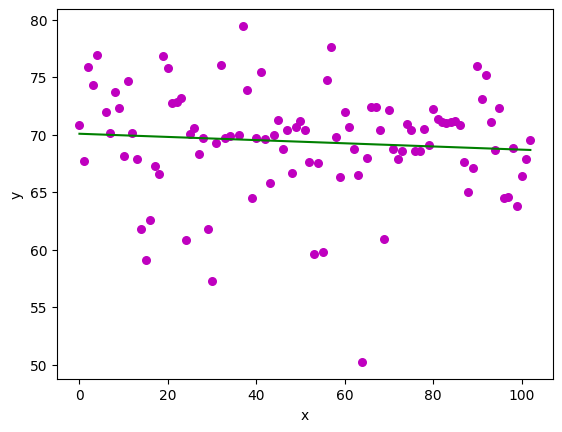

In [7]:
x=df_bin['stt'].tolist()
y=df_bin['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred= b[0] + b[1]*x

In [8]:
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=y_pred,
    name="Hiệu suất tuyến tính inverter 1"))